In [152]:
import pandas as pd
import requests
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt


## Analysis on Full Data

In [232]:
r=requests.get('http://192.168.0.197:5000/v1/stats/data/full')

df = pd.read_json(json.dumps(r.json()))

In [233]:
df.head(10)

,Student_full_time,age_6,cma,cma_name,cowmain,cowmain_name,educ,immig,is_student,lfsstat,naics_21,naics_21_true_value,prov,prov_name,schooln,sex,uhrsmain
0,,,0,Other CMA or non-CMA,1.0,Public sector employees,6,False,False,1,Educational services,16,59,British Columbia,1.0,F,320.0
1,,,8,Edmonton,,Not applicable,2,True,False,4,Not applicable,0,48,Alberta,1.0,M,
2,,,0,Other CMA or non-CMA,1.0,Public sector employees,4,False,False,2,Health care and social assistance,17,59,British Columbia,1.0,F,210.0
3,,,9,Vancouver,3.0,Self-employed incorporated with paid help,4,True,False,1,Accommodation and food services,19,59,British Columbia,1.0,M,300.0
4,,,0,Other CMA or non-CMA,,Not applicable,4,False,Not applicable,4,Not applicable,0,35,Ontario,,F,
5,True,4.0,4,Toronto,2.0,Private sector employees,2,False,True,1,"Business, building and other support services",15,35,Ontario,2.0,M,400.0
6,,,0,Other CMA or non-CMA,1.0,Public sector employees,4,False,Not applicable,1,Health care and social assistance,17,35,Ontario,,F,400.0
7,True,1.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,False,True,4,"Information, culture and recreation",18,47,Saskatchewan,2.0,F,
8,True,2.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,True,True,4,Accommodation and food services,19,47,Saskatchewan,2.0,M,
9,,2.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,False,False,4,Agriculture,1,10,Newfoundland and Labrador,1.0,M,


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Student_full_time    5921 non-null   object
 1   age_6                5921 non-null   object
 2   cma                  5921 non-null   int64 
 3   cma_name             5921 non-null   object
 4   cowmain              5921 non-null   object
 5   cowmain_name         5921 non-null   object
 6   educ                 5921 non-null   int64 
 7   immig                5921 non-null   object
 8   is_student           5921 non-null   object
 9   lfsstat              5921 non-null   int64 
 10  naics_21             5921 non-null   object
 11  naics_21_true_value  5921 non-null   int64 
 12  prov                 5921 non-null   int64 
 13  prov_name            5921 non-null   object
 14  schooln              5921 non-null   object
 15  sex                  5921 non-null   object
 16  uhrsma

##### There are only 5921 out of 107967 entires in this dataset. Most of them are lost during the transforming from csv to mysql. I tired servel time to improve the result but failed due to the hugh time consuming。

In [235]:
check = df[['sex','prov_name']].groupby('prov_name').value_counts()
check

prov_name                  sex
Alberta                    F      217
                           M      209
British Columbia           F      398
                           M      373
Manitoba                   F      234
                           M      227
New Brunswick              F      169
                           M      154
Newfoundland and Labrador  F      136
                           M      114
Nova Scotia                F      179
                           M      130
Ontario                    F      940
                           M      899
Prince Edward Island       F       59
                           M       46
Quebec                     F      573
                           M      544
Saskatchewan               F      167
                           M      153
dtype: int64

##### The sex distribution is almost evenly in most provinces. The data in Nova Scotia may be discussed to figure out the reason. Maybe the dataset is just to small or the males are moving to other porvinces for better job or education. Another point can be talked is the number of female is larger than male. Could it be related to the average life expectancy?  

In [236]:
df2 = df[['sex','prov_name','age_6']]

In [237]:
df2

,sex,prov_name,age_6
0,F,British Columbia,
1,M,Alberta,
2,F,British Columbia,
3,M,British Columbia,
4,F,Ontario,
...,...,...,...
5916,M,Alberta,
5917,M,Quebec,6.0
5918,M,British Columbia,
5919,F,Quebec,


In [238]:
df3 = df2.query("age_6 =='6.0' or age_6 == '5.0'")

In [239]:
df3.head(10)

,sex,prov_name,age_6
19,M,Ontario,6.0
39,F,Quebec,6.0
40,F,Alberta,6.0
63,M,Ontario,6.0
83,F,Ontario,6.0
115,F,Ontario,5.0
130,F,Ontario,6.0
135,F,Newfoundland and Labrador,5.0
151,M,Ontario,6.0
155,M,Nova Scotia,6.0


In [240]:
check = df3[['sex','age_6']].groupby('sex').value_counts()
check

sex  age_6
F    6.0      115
     5.0       69
M    6.0      104
     5.0       75
dtype: int64

##### It showed the result is not related to age group. So more work to find out why the difference.

<AxesSubplot:>

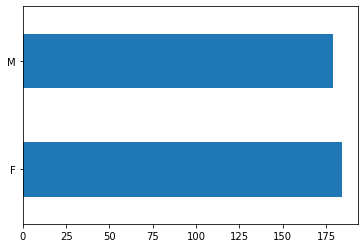

In [241]:
df3['sex'].value_counts()[:20].plot(kind='barh')

In [242]:
df2 = df[['sex','prov_name']]

In [243]:
check = df2[df2.prov_name=='Quebec'].groupby('sex').value_counts()
check

sex  prov_name
F    Quebec       573
M    Quebec       544
dtype: int64

##### Result for Quebec

In [244]:
check = df[['lfsstat','prov_name']].groupby('prov_name').value_counts()
check

prov_name                  lfsstat
Alberta                    1          240
                           4          150
                           2           18
                           3           18
British Columbia           1          429
                           4          291
                           2           31
                           3           20
Manitoba                   1          256
                           4          175
                           2           22
                           3            8
New Brunswick              1          153
                           4          152
                           3           10
                           2            8
Newfoundland and Labrador  1          115
                           4          100
                           3           23
                           2           12
Nova Scotia                1          145
                           4          137
                           2           17

In [84]:
check = df[['immig','prov_name']].groupby('prov_name').value_counts()
check

prov_name                  immig
Alberta                    False     326
                           True      100
British Columbia           False     560
                           True      211
Manitoba                   False     340
                           True      121
New Brunswick              False     300
                           True       23
Newfoundland and Labrador  False     236
                           True       14
Nova Scotia                False     296
                           True       13
Ontario                    False    1288
                           True      551
Prince Edward Island       False      95
                           True       10
Quebec                     False     986
                           True      131
Saskatchewan               False     280
                           True       40
dtype: int64

In [ ]:
check = df[['immig','prov_name']].groupby('prov_name').value_counts()

##### A closer study can be made on the affect for immigration per province with the factor of age group, education level and work force level.

In [159]:
df2 = df.query("immig == 'True'")

In [160]:
df2

,Student_full_time,age_6,cma,cma_name,cowmain,cowmain_name,educ,immig,is_student,lfsstat,naics_21,naics_21_true_value,prov,prov_name,schooln,sex,uhrsmain
1,,,8,Edmonton,,Not applicable,2,True,False,4,Not applicable,0,48,Alberta,1.0,M,
3,,,9,Vancouver,3.0,Self-employed incorporated with paid help,4,True,False,1,Accommodation and food services,19,59,British Columbia,1.0,M,300.0
8,True,2.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,True,True,4,Accommodation and food services,19,47,Saskatchewan,2.0,M,
12,,,6,Winnipeg,2.0,Private sector employees,4,True,False,1,Other services (except public administration),20,46,Manitoba,1.0,M,400.0
16,,,0,Other CMA or non-CMA,2.0,Private sector employees,4,True,False,1,"Business, building and other support services",15,12,Nova Scotia,1.0,M,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,,,0,Other CMA or non-CMA,2.0,Private sector employees,5,True,False,1,"Information, culture and recreation",18,46,Manitoba,1.0,M,380.0
5910,,,4,Toronto,,Not applicable,4,True,Not applicable,4,Not applicable,0,35,Ontario,,M,
5912,,,4,Toronto,2.0,Private sector employees,6,True,False,1,Finance and insurance,12,35,Ontario,1.0,F,400.0
5918,,,9,Vancouver,,Not applicable,0,True,Not applicable,4,Not applicable,0,59,British Columbia,,M,


In [161]:
check = df2[['prov_name']].groupby('prov_name').value_counts()

In [162]:
check

prov_name
Alberta                      100
British Columbia             211
Manitoba                     121
New Brunswick                 23
Newfoundland and Labrador     14
Nova Scotia                   13
Ontario                      551
Prince Edward Island          10
Quebec                       131
Saskatchewan                  40
dtype: int64

<AxesSubplot:ylabel='prov_name'>

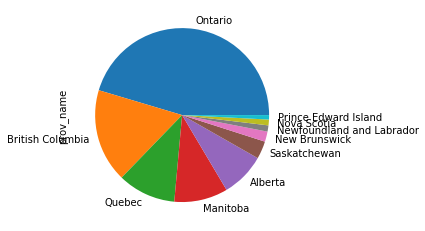

In [163]:
df2['prov_name'].value_counts().plot(kind='pie')

##### The population for Imigration in each province.

In [164]:
df.nunique()

Student_full_time        3
age_6                    7
cma                     10
cma_name                10
cowmain                  8
cowmain_name             8
educ                     7
immig                    2
is_student               3
lfsstat                  4
naics_21                22
naics_21_true_value     22
prov                    10
prov_name               10
schooln                  4
sex                      2
uhrsmain               113
dtype: int64

## Analysis on Student Data

In [165]:
r=requests.get('http://192.168.0.197:5000/v1/stats/data/students')

In [166]:
df = pd.read_json(json.dumps(r.json()))

In [167]:
df.head(10)

,Student_full_time,age_6,cma,cma_name,cowmain,cowmain_name,educ,immig,is_student,lfsstat,naics_21,naics_21_true_value,prov,prov_name,schooln,sex,uhrsmain
0,True,4.0,4,Toronto,2.0,Private sector employees,2,False,True,1,"Business, building and other support services",15,35,Ontario,2,M,400.0
1,True,1.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,False,True,4,"Information, culture and recreation",18,47,Saskatchewan,2,F,
2,True,2.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,True,True,4,Accommodation and food services,19,47,Saskatchewan,2,M,
3,True,2.0,0,Other CMA or non-CMA,,Not applicable,3,False,True,4,Not applicable,0,59,British Columbia,2,M,
4,True,2.0,6,Winnipeg,,Not applicable,2,True,True,4,Not applicable,0,46,Manitoba,2,F,
5,True,2.0,4,Toronto,2.0,Private sector employees,2,False,True,1,Retail trade,10,35,Ontario,2,F,200.0
6,True,1.0,0,Other CMA or non-CMA,,Not applicable,1,False,True,4,Not applicable,0,12,Nova Scotia,2,M,
7,True,2.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,False,True,4,"Information, culture and recreation",18,10,Newfoundland and Labrador,2,M,
8,True,3.0,0,Other CMA or non-CMA,2.0,Private sector employees,2,True,True,4,Health care and social assistance,17,13,New Brunswick,2,F,
9,True,1.0,0,Other CMA or non-CMA,2.0,Private sector employees,1,False,True,1,Retail trade,10,12,Nova Scotia,2,F,80.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Student_full_time    645 non-null    object
 1   age_6                645 non-null    object
 2   cma                  645 non-null    int64 
 3   cma_name             645 non-null    object
 4   cowmain              645 non-null    object
 5   cowmain_name         645 non-null    object
 6   educ                 645 non-null    int64 
 7   immig                645 non-null    object
 8   is_student           645 non-null    object
 9   lfsstat              645 non-null    int64 
 10  naics_21             645 non-null    object
 11  naics_21_true_value  645 non-null    int64 
 12  prov                 645 non-null    int64 
 13  prov_name            645 non-null    object
 14  schooln              645 non-null    int64 
 15  sex                  645 non-null    object
 16  uhrsmain

In [169]:
df.nunique()

Student_full_time       2
age_6                   7
cma                    10
cma_name               10
cowmain                 5
cowmain_name            5
educ                    7
immig                   2
is_student              1
lfsstat                 4
naics_21               21
naics_21_true_value    21
prov                   10
prov_name              10
schooln                 2
sex                     2
uhrsmain               52
dtype: int64

In [176]:
check = df[['age_6']].groupby('age_6').value_counts()
check

age_6
        91
1.0    158
2.0    172
3.0     88
4.0     85
5.0     31
6.0     20
dtype: int64

<AxesSubplot:ylabel='age_6'>

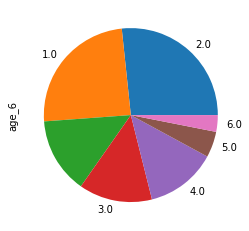

In [179]:
df['age_6'].value_counts().plot(kind='pie')

##### The age group for students.

#### <font color = red>People in all age group are taking course may be a good sign for society or increasing work demanding?</font>

In [172]:
check = df[['age_6','prov_name']].groupby('age_6').value_counts()
check

age_6  prov_name                
       Ontario                      25
       Quebec                       20
       British Columbia             16
       New Brunswick                 7
       Newfoundland and Labrador     6
                                    ..
6.0    Manitoba                      2
       Ontario                       2
       Saskatchewan                  2
       Alberta                       1
       Nova Scotia                   1
Length: 66, dtype: int64

<AxesSubplot:>

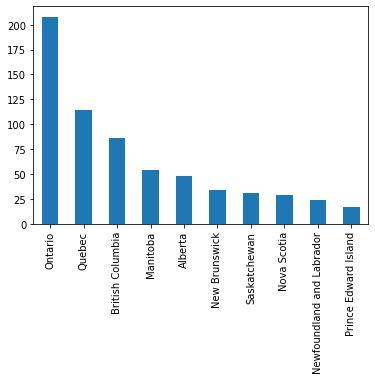

In [174]:
df['prov_name'].value_counts()[:20].plot(kind='bar')

##### The number of students for each province

#### Can be further studied with the data of international students.

## Analysis on Province Quebec

In [197]:
r=requests.get('http://192.168.0.197:5000/v1/stats/data/province/Quebec')

df = pd.read_json(json.dumps(r.json()))

df.head(10)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Student_full_time    1117 non-null   object
 1   age_6                1117 non-null   object
 2   cma                  1117 non-null   int64 
 3   cma_name             1117 non-null   object
 4   cowmain              1117 non-null   object
 5   cowmain_name         1117 non-null   object
 6   educ                 1117 non-null   int64 
 7   immig                1117 non-null   object
 8   is_student           1117 non-null   object
 9   lfsstat              1117 non-null   int64 
 10  naics_21             1117 non-null   object
 11  naics_21_true_value  1117 non-null   int64 
 12  prov                 1117 non-null   int64 
 13  prov_name            1117 non-null   object
 14  schooln              1117 non-null   object
 15  sex                  1117 non-null   object
 16  uhrsma

In [201]:
df.nunique()

Student_full_time       3
age_6                   7
cma                     3
cma_name                3
cowmain                 7
cowmain_name            7
educ                    7
immig                   2
is_student              3
lfsstat                 4
naics_21               22
naics_21_true_value    22
prov                    1
prov_name               1
schooln                 4
sex                     2
uhrsmain               64
dtype: int64

In [202]:
df2 = df[['educ','cowmain','uhrsmain']]

In [203]:
df2

,educ,cowmain,uhrsmain
0,6,1.0,400.0
1,2,,
2,2,1.0,400.0
3,4,,
4,5,2.0,350.0
...,...,...,...
1112,1,4.0,350.0
1113,4,1.0,150.0
1114,3,2.0,200.0
1115,5,2.0,400.0


In [222]:
corr = df.corr()

In [223]:
corr

,cma,educ,lfsstat,naics_21_true_value,prov
cma,1.000000,0.161414,-0.005771,0.011107,NaN
educ,0.161414,1.000000,-0.283729,0.292454,NaN
lfsstat,-0.005771,-0.283729,1.000000,-0.745381,NaN
naics_21_true_value,0.011107,0.292454,-0.745381,1.000000,NaN
prov,NaN,NaN,NaN,NaN,NaN


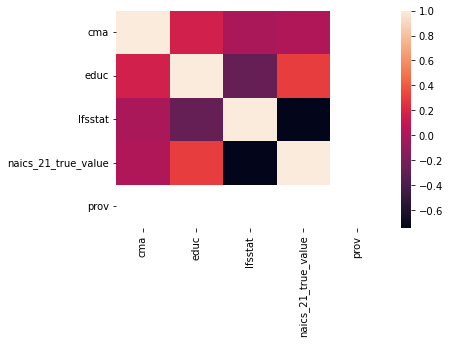

In [227]:
dataplot = sns.heatmap(corr)
plt.show()

### The result is not as expected since some data are imported as text. Tried servral ways to change the type but failed. Need to pratice on Mysql Database.

In [221]:
df2

,educ,cowmain,uhrsmain
0,6,1.0,400.0
1,2,1.0,
2,2,1.0,400.0
3,4,1.0,
4,5,1.0,350.0
...,...,...,...
1112,1,1.0,350.0
1113,4,1.0,150.0
1114,3,1.0,200.0
1115,5,1.0,400.0


## Analysis on Labour Force Status

In [230]:
r=requests.get('http://192.168.0.197:5000/v1/stats/data/lfs/1')

df = pd.read_json(json.dumps(r.json()))

df.head(10)

,Student_full_time,age_6,cma,cma_name,cowmain,cowmain_name,educ,immig,is_student,lfsstat,naics_21,naics_21_true_value,prov,prov_name,schooln,sex,uhrsmain
0,,,0,Other CMA or non-CMA,1,Public sector employees,6,False,False,1,Educational services,16,59,British Columbia,1.0,F,320
1,,,9,Vancouver,3,Self-employed incorporated with paid help,4,True,False,1,Accommodation and food services,19,59,British Columbia,1.0,M,300
2,True,4.0,4,Toronto,2,Private sector employees,2,False,True,1,"Business, building and other support services",15,35,Ontario,2.0,M,400
3,,,0,Other CMA or non-CMA,1,Public sector employees,4,False,Not applicable,1,Health care and social assistance,17,35,Ontario,,F,400
4,,,1,Qu茅bec,1,Public sector employees,6,False,False,1,Educational services,16,24,Quebec,1.0,F,400
5,,,6,Winnipeg,2,Private sector employees,4,True,False,1,Other services (except public administration),20,46,Manitoba,1.0,M,400
6,,,0,Other CMA or non-CMA,2,Private sector employees,2,False,False,1,"Mining, quarrying, and oil and gas extraction",4,35,Ontario,1.0,M,600
7,,,0,Other CMA or non-CMA,2,Private sector employees,4,True,False,1,"Business, building and other support services",15,12,Nova Scotia,1.0,M,600
8,,,0,Other CMA or non-CMA,4,Self-employed incorporated no paid help,2,False,False,1,Construction,6,13,New Brunswick,1.0,M,400
9,,,0,Other CMA or non-CMA,1,Public sector employees,6,False,False,1,Educational services,16,13,New Brunswick,1.0,F,362


In [229]:
r=requests.get('http://192.168.0.197:5000/v1/stats/data/lfs/2')

df = pd.read_json(json.dumps(r.json()))

df.head(10)

,Student_full_time,age_6,cma,cma_name,cowmain,cowmain_name,educ,immig,is_student,lfsstat,naics_21,naics_21_true_value,prov,prov_name,schooln,sex,uhrsmain
0,,,0,Other CMA or non-CMA,1,Public sector employees,4,False,False,2,Health care and social assistance,17,59,British Columbia,1.0,F,210
1,,6.0,0,Other CMA or non-CMA,2,Private sector employees,4,False,False,2,Public administration,21,24,Quebec,1.0,F,400
2,,,0,Other CMA or non-CMA,1,Public sector employees,5,True,False,2,Educational services,16,35,Ontario,1.0,M,400
3,,3.0,0,Other CMA or non-CMA,2,Private sector employees,2,False,False,2,Construction,6,47,Saskatchewan,1.0,M,400
4,,,9,Vancouver,1,Public sector employees,4,True,False,2,Transportation and warehousing,11,59,British Columbia,1.0,M,400
5,,,9,Vancouver,2,Private sector employees,1,False,False,2,"Information, culture and recreation",18,59,British Columbia,1.0,F,200
6,,,0,Other CMA or non-CMA,2,Private sector employees,4,False,False,2,Manufacturing - non-durable goods,8,12,Nova Scotia,1.0,M,400
7,,,4,Toronto,2,Private sector employees,4,True,False,2,Retail trade,10,35,Ontario,1.0,F,400
8,,,5,Hamilton,2,Private sector employees,4,False,False,2,"Professional, scientific and technical services",14,35,Ontario,1.0,F,400
9,,5.0,5,Hamilton,6,Self-employed unincorporated no paid help,4,False,False,2,Health care and social assistance,17,35,Ontario,1.0,F,150


## It can be analysised with the data in Part I.

In [205]:
corr

,educ
educ,1.0


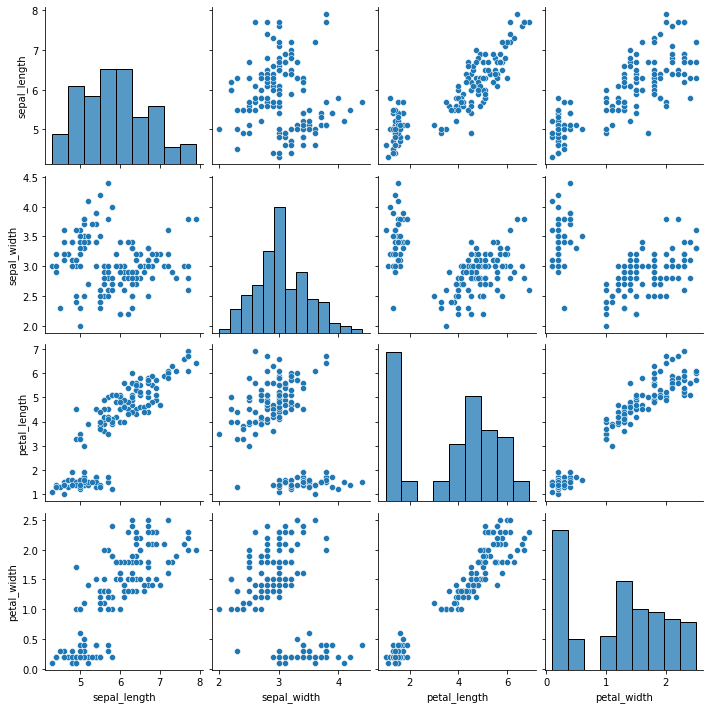